#  Knudsen Number of Atoms

This is a notebook to plot the Knudsen number for various different temperatures modelling a metallic element in the atomic beam oven as it comes out of the crucible nozzle

Assuming that the Calcium gas which is produced inside the crucible is an ideal gas ($PV = NkT$) and using the kinteic theory of gases (where velocity profiles of the atoms in the gas follow the Maxwell-Boltzmann distribution) the Knudsen number can be shown to be

$K = \frac{kT}{\sqrt{2}{\pi}d^2LP_{vap}}$

where T is the temperature in Kelvin, k is the Boltzmann constant, d is the diameter of the atom, L is the length scale over which we are examining the flow of atoms, and $P_{vap}$ is the vapour pressure of the gas of atoms.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


First, we define all our parameters for Calcium

In [2]:
k = 1.381e-23
d_ca = 462e-12  #from wikipedia page on Calcium
L = 20.1e-3  #measured using calipers

#Vapour pressure found from Alcock 1984, Canadian Metallurgical Quarterly
#Temperature range of 293 K to melting point of 1115
def Pvap_ca(T):
    P = pow(10, (15.133 - 9517/T-1.403*np.log10(T)))
    return P

#Define the Knudsen Number
def Knudsen_ca(T):
    numer = k*T
    denom = np.sqrt(2)*np.pi*pow(d_ca,2)*L*Pvap_ca(T)
    return numer/denom

Now, we set a temperature range to calculate the Knudsen number and calculate the corresponding Knudsen numbers

In [3]:
Trange_ca = np.linspace(800, 1000, 200)
Krange_ca = Knudsen_ca(Trange_ca)

Plot the data

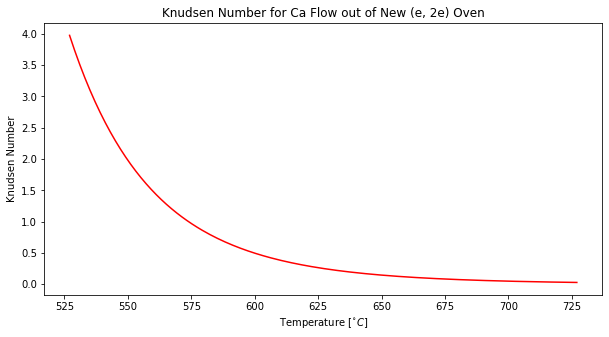

In [4]:
#Set the range of temperature to plot over to degrees C so 
#take away 273 from Trange as 0 deg C = 273 deg K.
Tplotrange_ca = Trange_ca - 273

figca = plt.figure(figsize = [10,5])
axca1 = figca.add_subplot(1,1,1)
axca1.plot(Tplotrange_ca, Krange_ca, color = "r")
axca1.set_title("Knudsen Number for Ca Flow out of New (e, 2e) Oven")
axca1.set_ylabel("Knudsen Number")
axca1.set_xlabel("Temperature [$^{\circ}C$]")
figca.savefig("CaKnudsen.svg", dpi = 350)

For Magnesium the vapour pressure and diameter are different. Use an object-oriented method this time:

Start by defining an element class: 
<br> __Element class__
Object parameters:
 - Van der Waals radius
 - Initialiser
<br>Functions include:
 - get diameter
 
 <br> Define a __Magnesium__ class which inherits the __Element__ class and define a vapour pressure for a range of temperatures.

In [5]:
class Element:
    #Initialiser
    def __init__(self, radius):
        self.radius = radius
    #Class Functions
    #Get the diameter of the atom d = 2r
    def diameter(self):
        return 2*self.radius

class Magnesium(Element):
    #Vapour pressure [Pascals] for a range of temperatures [Kelvin]
    #For magnesium this is from Alcock 1984, Canadian Metallurgical Quarterly
    #Temperature range between 298 K to 923 K
    def Pvap(self, T):
        P = pow(10, 13.495 - (7813/T) - 0.8253*np.log10(T) )
        return P

#Knudsen number definition with scale in [m], T is in [K]
def Knudsen(elem, T, scale):
    numerator = k*T
    denominator = np.sqrt(2)*np.pi*pow(elem.diameter(),2)*scale*elem.Pvap(T)
    return numerator/denominator

mg1 = Magnesium(173e-12)

Plot the variation of knudsen number with temperature for magnesium

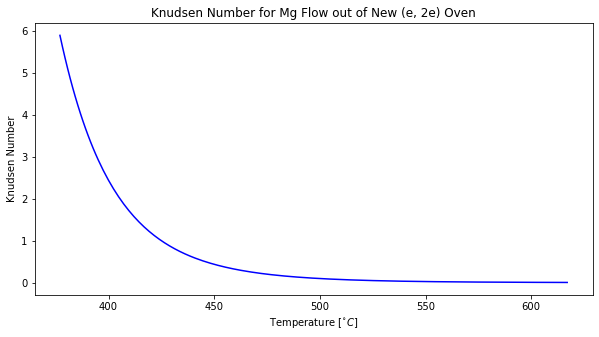

In [6]:
Trange_mg = np.linspace(650, 890, 200)
Krange_mg = Knudsen(mg1, Trange_mg, L)

Tplotrange_mg = Trange_mg - 273

figmg = plt.figure(figsize = [10,5])
axmg1 = figmg.add_subplot(1,1,1)
axmg1.plot(Tplotrange_mg, Krange_mg, color = "b")
axmg1.set_title("Knudsen Number for Mg Flow out of New (e, 2e) Oven")
axmg1.set_ylabel("Knudsen Number")
axmg1.set_xlabel("Temperature [$^{\circ}C$]")
figmg.savefig("MgKnudsen.svg", dpi = 350)

## Strontium

Diameter of Sr atom is
<br> $d_{Sr}$ = 498 pm
<br>The vapour pressure has the form of 
<br>  $logP = 5.006 + A + BT^{-1} + Clog(T)$
<br>, given by Alcock 1984. The coefficients are:

|Coefficient | Value |
|------------|-------|
|   A        |9.226  |
|   B        |-8572  |
|   C        |-1.1926|




In [7]:
#Define strontium class
class Strontium(Element):
    #Vapour pressure in [Pa]
    def Pvap(self, T):
        P = pow(10, 14.232 - (8572/T) - 1.1926*np.log10(T))
        return P

sr1 = Strontium(249e-12)

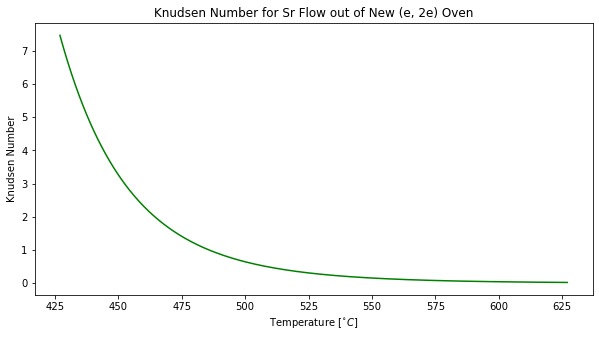

In [8]:
#Plot Knudsen number for Sr against T
Trange_sr = np.linspace(700, 900, 400)
l = 30e-3  #Approximately length of skimmer
Krange_sr = Knudsen(sr1, Trange_sr, l)

Tplotrange_sr = Trange_sr - 273  #Convert scale to degrees Celcius for display on graph

#Plot graph
figsr = plt.figure(figsize = [10,5])
axsr1 = figsr.add_subplot(1,1,1)
axsr1.plot(Tplotrange_sr, Krange_sr, color = "g")
axsr1.set_title("Knudsen Number for Sr Flow out of New (e, 2e) Oven")
axsr1.set_ylabel("Knudsen Number")
axsr1.set_xlabel("Temperature [$^{\circ}C$]")
figsr.savefig("SrKnudsen.svg", dpi = 350)